In [1]:
# %load exp_map_1.py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import astropy.coordinates as coord
import astropy.units as u
import ephem
import sys
from astropy.coordinates import Longitude

In [2]:
sys.path.append("../research2017/BNS-MergerRates/data")

In [3]:
data=np.genfromtxt("../BNS-MergerRates/data/200mpc_v1_1.txt")

In [4]:
ra=data[:,0]*u.deg
ra.wrap_angle=180*u.deg
dec=data[:,1]*u.degree
mass=data[:,7]

In [5]:
sele=(np.where(mass>6) and np.where(mass<14))

In [7]:
mass[sele].shape

(433415,)

In [6]:
def plot_mwd(ra,dec):
    """creates map of average number of galaxies in each pixel of the sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=150)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Density of galaxies")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

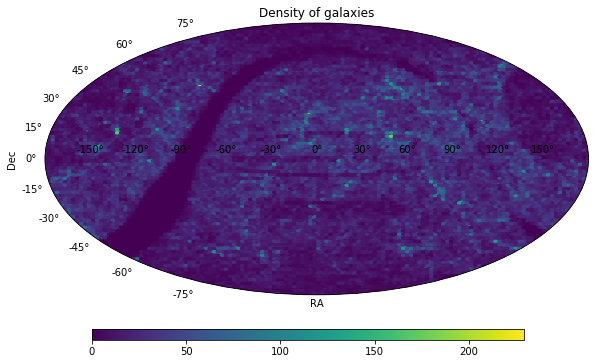

In [7]:
plot_mwd(np.radians(ra.value),np.radians(dec.value))

In [12]:
def plot_mass(ra,dec,mass):
    """creates map of average mass per pixel in sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=200,C=mass,vmin=8,vmax=14)#reduce_C_function=np.sum
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Stellar Mass density of galaxies")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

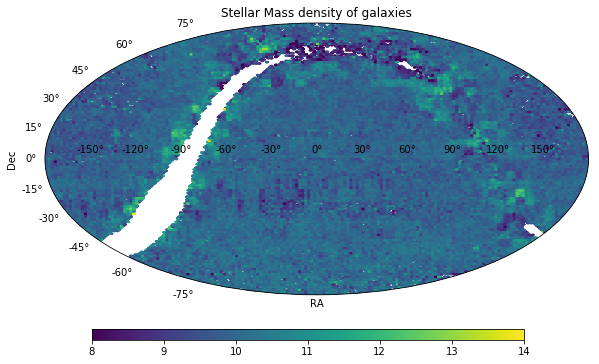

In [13]:
plot_mass(np.radians(ra[sele].value),np.radians(dec[sele].value),mass[sele])

In [14]:
def calcRate(reticMass, retTime, dwarfG, mass): #mass of Reticulum II, lookback-time of event, number of dwarf galaxies, mass array
    """Calculate rate of BNS merger events in a given galaxy, taking Reticulum II as base case"""
    rateRet=(1/dwarfG)*(1/reticMass)*(1/retTime) #10**(-15) BNS merger event per stellar mass per year in Ret II
    relMass=10**mass/reticMass #relative stellar mass: stellar mass ration between galaxy and Ret II 
    rate=rateRet*relMass #rate of events for each galaxy
    return rate

In [15]:
rateArray=calcRate(2*10**3,10**10,10,mass)

In [16]:
print(rateArray)

[  1.57739336e-08   9.95267926e-09   1.57739336e-08 ...,   1.98582059e-03
   6.27971608e-09   9.95267926e-13]


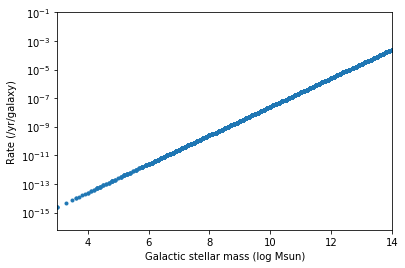

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(mass,rateArray,'.')
ax.set_yscale('log')
ax.set_xlabel('Galactic stellar mass (log Msun)')
ax.set_ylabel('Rate (/yr/galaxy)')
ax.set_xlim((3,14))
ax.set_ylim((0,10**(-1)))
plt.show()

In [18]:
def plot_rate(ra,dec,mass):
    """Plot average rate of BNS merger events in every pixel of sky"""
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=400,C=calcRate(2*10**3,10**10,10,mass[sele]),vmin=0,vmax=0.00001)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("2D Histogram of rates")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

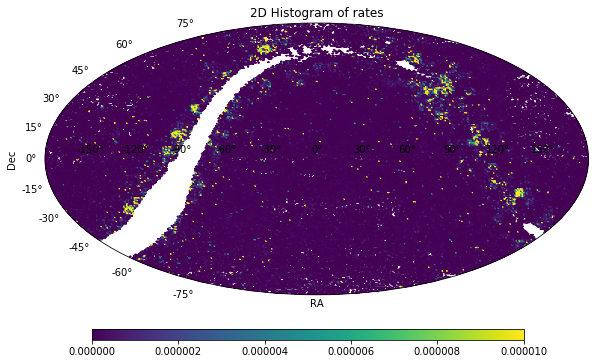

In [19]:
plot_rate(np.radians(ra[sele].value),np.radians(dec[sele].value),mass)

In [37]:
def plot_cNumber(ra,dec):
    """creates map of cumulative number of galaxies in each pixel of the sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=150,reduce_C_function=np.sum,vmin=0,vmax=250)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Cumulative density of galaxies")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

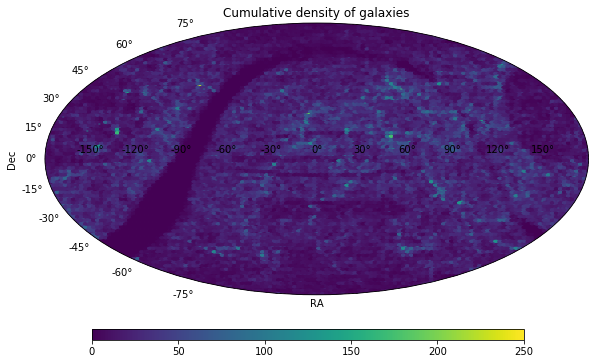

In [38]:
plot_cNumber(np.radians(ra[sele].value),np.radians(dec[sele].value))

In [39]:
def plot_cMass(ra,dec,mass):
    """creates map of cumulative mass per pixel in sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=200,C=mass,reduce_C_function=np.sum,vmin=200,vmax=1400)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Cumulative Stellar Mass of galaxies")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

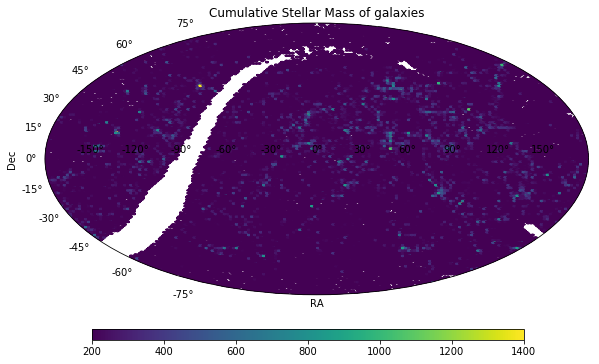

In [40]:
plot_cMass(np.radians(ra[sele].value),np.radians(dec[sele].value),mass[sele])

In [48]:
def plot_cRate(ra,dec,mass):
    """Plot cumulative rate of BNS merger events in every pixel of sky"""
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=400,C=calcRate(2*10**3,10**10,10,mass),reduce_C_function=np.sum,vmin=0,vmax=0.1)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Spatial distribution of cummulative rates")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

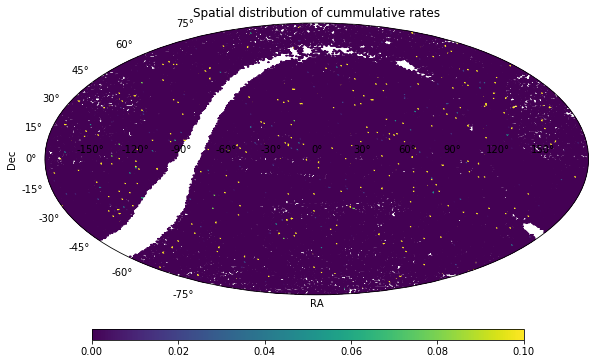

In [49]:
plot_cRate(np.radians(ra[sele].value),np.radians(dec[sele].value),mass)